<a href="https://colab.research.google.com/github/labibasarwer/Predicting-Breast-Cancer-Survival-Using-Machine-Learning/blob/main/Initial_Results_and_Code_Labiba_Sarwer_CIND820.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, confusion_matrix
from imblearn.over_sampling import SMOTE
!pip install lifelines --quiet # Install lifelines before importing
from lifelines import KaplanMeierFitter # Now import KaplanMeierFitter
!pip install imbalanced-learn --quiet

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.7/115.7 kB 4.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd # Import the pandas library and assign it to the alias 'pd'

# Load dataset, specifying the engine for CSV files
df = pd.read_csv("/content/drive/MyDrive/Breast_Cancer - Breast_Cancer.csv") # Changed pd.read_excel to pd.read_csv

In [ ]:
# Display basic info
display(df.info())
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

None

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [ ]:
# Encode categorical variables using One-Hot Encoding
categorical_features = ['Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage', 'differentiate', 'Grade', 'A Stage', 'Estrogen Status', 'Progesterone Status']
# Added a space after 'T Stage' to match the actual column name in the dataframe
# Please verify other column names for similar typos!

# Alternatively, print df.columns to see all column names and copy-paste the exact names
# print(df.columns)

df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)

In [ ]:
# Alternatively, print df.columns to see all column names and copy-paste the exact names
# print(df.columns)

df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)

In [ ]:
# Convert target variable to binary
df_encoded['Status'] = df_encoded['Status'].apply(lambda x: 1 if x == 'Alive' else 0)

In [ ]:
# Standardize numerical features
from sklearn.preprocessing import StandardScaler # Import StandardScaler
scaler = StandardScaler()
numerical_features = ['Age', 'Tumor Size', 'Regional Node Examined', 'Reginol Node Positive', 'Survival Months']
df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])

In [ ]:
# Split data into features and target
X = df_encoded.drop(columns=['Status'])
y = df_encoded['Status']

# Import SMOTE from imblearn.over_sampling
from imblearn.over_sampling import SMOTE # Correctly import SMOTE

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Import train_test_split from sklearn.model_selection
from sklearn.model_selection import train_test_split # Make sure to import it here

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


In [ ]:
# Define models
from sklearn.linear_model import LogisticRegression # Import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
}

Logistic Regression Accuracy: 0.8365
              precision    recall  f1-score   support

           0       0.85      0.82      0.83       685
           1       0.82      0.85      0.84       679

    accuracy                           0.84      1364
   macro avg       0.84      0.84      0.84      1364
weighted avg       0.84      0.84      0.84      1364



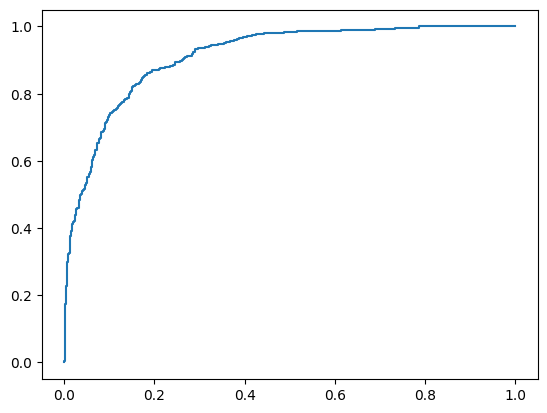

Random Forest Accuracy: 0.9362
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       685
           1       0.94      0.93      0.94       679

    accuracy                           0.94      1364
   macro avg       0.94      0.94      0.94      1364
weighted avg       0.94      0.94      0.94      1364



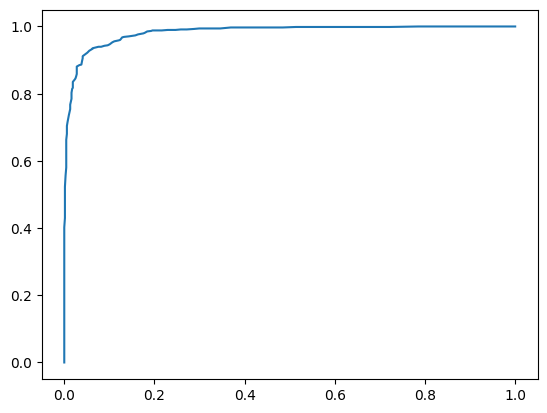

Neural Network Accuracy: 0.8893
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       685
           1       0.89      0.89      0.89       679

    accuracy                           0.89      1364
   macro avg       0.89      0.89      0.89      1364
weighted avg       0.89      0.89      0.89      1364



/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


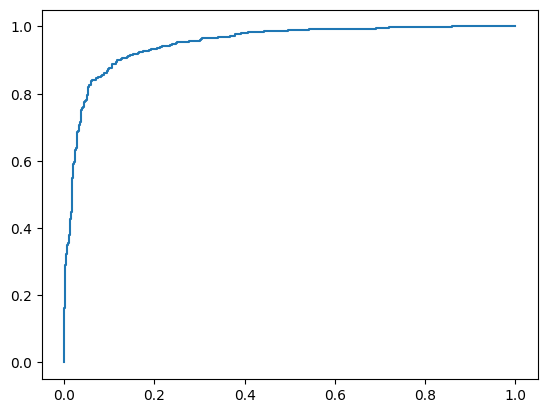

In [ ]:
# Train and evaluate models
import matplotlib.pyplot as plt # Import matplotlib.pyplot
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, confusion_matrix # Import necessary metrics

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else y_pred

    # Compute metrics
    acc = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))

    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {auc(fpr, tpr):.4f}")
    plt.show() # To display the plots immediately within the loop

<ipython-input-9-b4d7ece3c8e8>:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


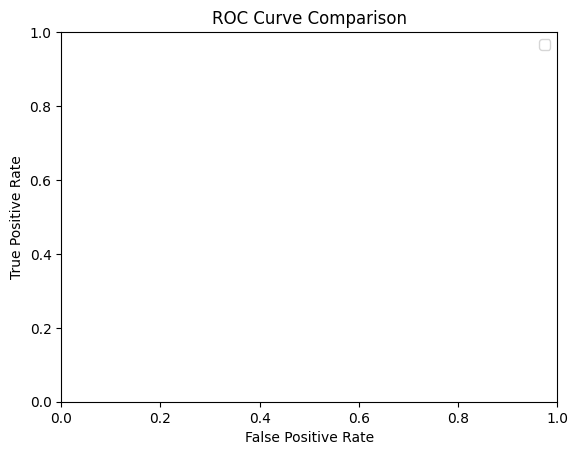

In [ ]:
# Finalize ROC Curve plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.7/115.7 kB 8.6 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=195a604ec4e81e5e0122b7844f648d13520006f56f76f62c4a4e678b903bea7a
  Stored in directory: /root/.cache/pip/wheels/8b/67/f4/2caaae2146198dcb824f31a303833b07b14a5ec863fb3acd7b
Successfully built autograd-gamma


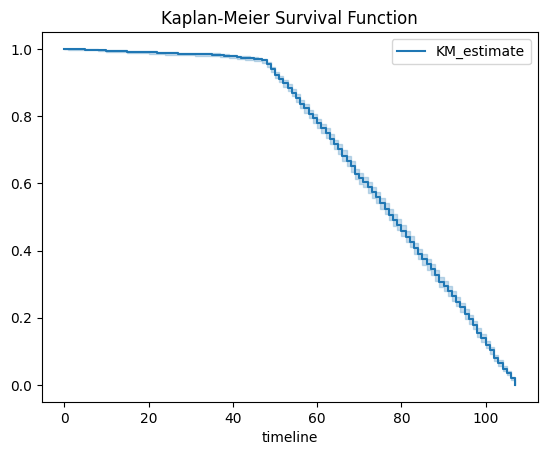

In [ ]:
!pip install lifelines # Install the lifelines package

# Kaplan-Meier Survival Analysis
from lifelines import KaplanMeierFitter # Import KaplanMeierFitter here
kmf = KaplanMeierFitter()
kmf.fit(df['Survival Months'], event_observed=df_encoded['Status'])
kmf.plot_survival_function()
plt.title('Kaplan-Meier Survival Function')
plt.show()

In [ ]:
import os

# Create the directory if it doesn't exist
os.makedirs("/mnt/data", exist_ok=True)

# Save cleaned dataset
df_encoded.to_csv("/mnt/data/cleaned_breast_cancer_data.csv", index=False)
print("Cleaned dataset saved successfully.")

Cleaned dataset saved successfully.
